In [1]:
import pandas as pd
import matplotlib as plt
import utils
import datetime

In [2]:
df_movies_meta = pd.read_csv('the-movies-dataset/movies_metadata.csv')

In [3]:
df_movies_meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df_movies =df_movies_meta[['release_date',
                           'original_title', 
                           'original_language', 
                           'production_countries',
                           'budget',
                           'revenue']]

In [5]:
len(df_movies)

45466

In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date          45379 non-null  object 
 1   original_title        45466 non-null  object 
 2   original_language     45455 non-null  object 
 3   production_countries  45463 non-null  object 
 4   budget                45466 non-null  object 
 5   revenue               45460 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


In [7]:
df_movies.release_date = df_movies.release_date.map(lambda x: str(x))
df_movies.budget = pd.to_numeric(df_movies.budget, errors='coerce')
df_movies.revenue = pd.to_numeric(df_movies.revenue, errors='coerce')

In [8]:
df_movies.release_date = pd.to_datetime(df_movies.release_date, errors='coerce')

In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          45376 non-null  datetime64[ns]
 1   original_title        45466 non-null  object        
 2   original_language     45455 non-null  object        
 3   production_countries  45463 non-null  object        
 4   budget                45463 non-null  float64       
 5   revenue               45460 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 2.1+ MB


In [10]:
df_movies = df_movies.dropna()

In [11]:
df_movies = df_movies.sort_values(by='release_date')

In [12]:
df_movies = df_movies[(df_movies.release_date.dt.year > 1965) & (df_movies.release_date.dt.year < 2015)]

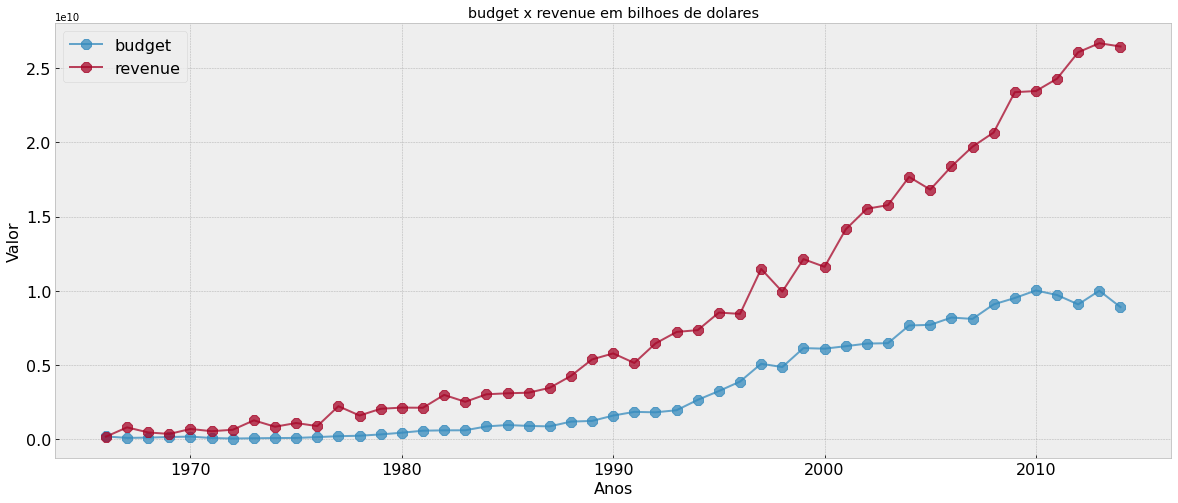

In [13]:
%matplotlib inline
plt.style.use('bmh')

ax = df_movies.groupby(df_movies.release_date.dt.year).sum().plot(
        kind='line', 
        figsize=(20,8),
        grid=True,
        alpha=0.75,
        fontsize = 16,
        legend=True,
        marker = "8", 
        markersize =10, 
        title="budget x revenue em bilhoes de dolares")

ax.set_ylabel('Valor', fontsize=16)
ax.set_xlabel('Anos', fontsize=16)

ax.legend(loc=2, prop={'size': 16})